# Feature Engineering

We begin with the clean dataset located at data/cleaned/oil_production_clean.csv and focus on engineering features that will enhance the predictive accuracy of time series models, particularly those capable of handling multiple predictors.

* Incorporate temporal features to capture aspects such as seasonality, cyclical patterns, and overall trends to allow the model to understand time-based variations.

* Generate lagged variables and rolling window statistics to help models learn from autocorrelations and momentum in the data.

* Apply normalization or scaling techniques where needed to ensure all features are on compatible scales and improve model training efficiency.

* Prepare the final feature-enriched dataset for use in the modeling notebooks 04 through 06.

This approach aims to create a comprehensive dataset that enables robust and accurate forecasting.

### 1-Imports and Load Clean data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [5]:
# Loading cleaned dataset
df = pd.read_csv("../data/cleaned/oil_production_cleaned.csv")
df['period'] = pd.to_datetime(df['period'])
df = df.sort_values('period')
df.head()

,period,MBBL,MBBL/D,Rolling_Avg_12m
0,1981-01-01,28698,926,NaN
1,1981-02-01,27285,974,NaN
2,1981-03-01,30245,976,NaN
3,1981-04-01,28789,960,NaN
4,1981-05-01,30033,969,NaN


### 2-Feature Extraction

#### Date-based Features

In [6]:
df['year'] = df['period'].dt.year
df['month'] = df['period'].dt.month
df['quarter'] = df['period'].dt.quarter
df['dayofyear'] = df['period'].dt.dayofyear
df['weekofyear'] = df['period'].dt.isocalendar().week
df['is_month_start'] = df['period'].dt.is_month_start.astype(int)
df['is_month_end'] = df['period'].dt.is_month_end.astype(int)

#### Lag features(past values)

In [7]:
# 1, 2, 3, 4 month lags
for lag in [1, 2, 3, 4]:
    df[f'lag_{lag}'] = df['MBBL/D'].shift(lag)

#### Rolling window statistics

In [8]:
# Rolling averages
df['rolling_mean_3'] = df['MBBL/D'].shift(1).rolling(window=3).mean()
df['rolling_mean_6'] = df['MBBL/D'].shift(1).rolling(window=6).mean()
df['rolling_std_3'] = df['MBBL/D'].shift(1).rolling(window=3).std()
df['rolling_std_6'] = df['MBBL/D'].shift(1).rolling(window=6).std()

### 3-Creating Target variable

In [9]:
df['target'] = df['MBBL/D'].shift(-1)

To predict next months MBB:?D based on past + current features

### 4-Remove NaN rows

In [10]:
df= df.dropna().reset_index(drop=True)

### 5-Visualization of engineered features

In [11]:
display(df.head())

,period,MBBL,MBBL/D,Rolling_Avg_12m,year,month,quarter,dayofyear,weekofyear,is_month_start,is_month_end,lag_1,lag_2,lag_3,lag_4,rolling_mean_3,rolling_mean_6,rolling_std_3,rolling_std_6,target
0,1981-12-01,30597,987,974.583333,1981,12,4,335,49,1,0,993.0,981.0,1016.0,998.0,996.666667,983.833333,17.785762,31.070350,948.0
1,1982-01-01,29383,948,976.416667,1982,1,1,1,53,1,0,987.0,993.0,981.0,1016.0,987.000000,983.333333,6.000000,30.975259,1057.0
2,1982-02-01,29602,1057,983.333333,1982,2,1,32,5,1,0,948.0,987.0,993.0,981.0,976.000000,987.166667,24.433583,22.604572,1020.0
3,1982-03-01,31623,1020,987.000000,1982,3,1,60,9,1,0,1057.0,948.0,987.0,993.0,997.333333,997.000000,55.229823,36.698774,944.0
4,1982-04-01,28328,944,985.666667,1982,4,2,91,13,1,0,1020.0,1057.0,948.0,987.0,1008.333333,997.666667,55.428633,37.146557,1029.0


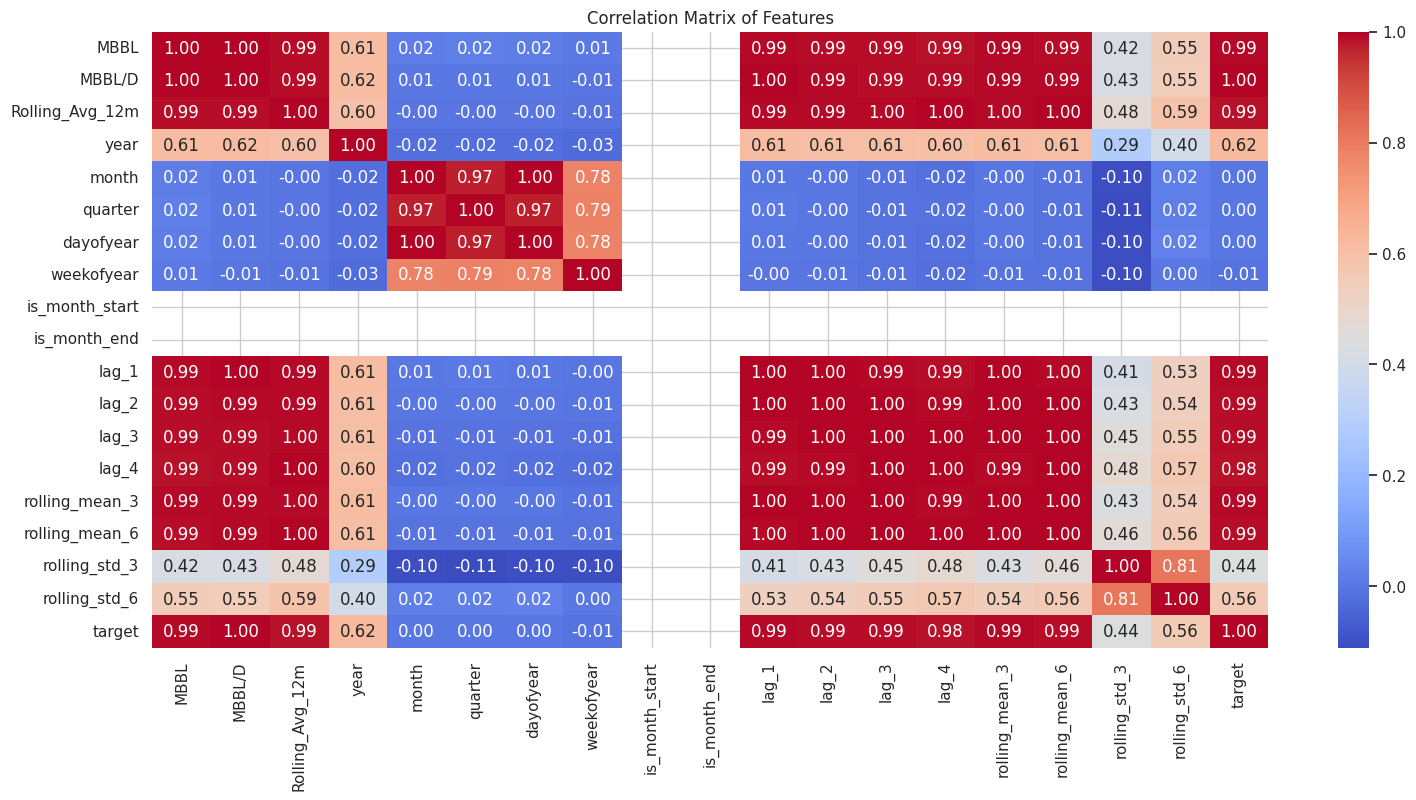

In [13]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

The correlation matrix illustrates strong autocorrelation among lagged and rolling window features, which is typical in time series analyses of steady industrial domains such as oil production. For statistical models like linear regression, it's advisable to either select a smaller, less collinear subset of features or apply regularization techniques such as Lasso or Ridge to mitigate multicollinearity issues. Conversely, deep learning and tree-based models can usually handle these highly correlated predictors without problem, often leveraging nonlinear relationships to enhance predictive performance.

### 6-Save the dataset created

In [14]:
df.to_csv("../data/processed/oil_production_features.csv", index=False)